Yarden Dahan,  
ID:208730523

# **Lab 3- Filters and Convolution**
# **Computer Vision (10224)**
<img src='https://upload.wikimedia.org/wikipedia/he/thumb/9/94/%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg/560px-%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg'></img>	

## **Goals**
* Removing noise from images.
* Implementing image augmentations.
* Implementing template matching.

## **Preparatory report**
* Write a function which addes gaussian noise to an image, the function template is as follows: <br>
<code>def add_guassian_noise(img: np.ndarray, mean: float, sigma: float) -> np.ndarray: 
return noised_image</code>
   * Pass the parameters below to the function and observe and explain the results.:
      * mean = 0.1
      * sigma = 0.001
   * Do the same as the above with the following parameters: 
      * mean = 0
      * sigma = 5
* Write a function which removes noises, and use it to clean the noisy images from above. <br> You may choose any filter you deem right for the task.
the function template is as follows:
<code>def remove_noise(img: np.ndarray, filter: np.ndarray) -> np.ndarray: 
return clean_img</code>
   * Show the original image, noised_image and clean image using **matplotlib subplot**.
   * Show the absoulute differnce between the images and compare their histograms (using numpy).
   * Measure the MSE of the following:
     * <code> mse(source_img, noisy_image) </code>
     * <code> mse(source_img, denoised_image) </code> 
   * Do this on the two noisy images you got previously.
   * Explain the obtained scores. 
   
* Write a function which [rotates an image](https://en.wikipedia.org/wiki/Rotation_matrix), the function template is as follows: 
<code>def rotate_image(img: np.ndarray, angle: float) -> np.ndarray: 
return rotated_img </code>
   * The rotation function shouldn't alter the image dimensions. 
   * You aren't allowed to use cv2 image rotate function for this task but you may compare your results.
  
 * Review and write a short summary (up to 5 lines) of [albumentations](https://albumentations.ai/docs/).

## **Lab Session**
1. Write a class which executes the following augmentations:
    1. Flip Vertically or Horizontally (randomly each call) 
    2. Rotate 
    3. Gaussian-Blur 
    4. Median-Blur 
    5. Zoom
    6. Crop 
    7. Sharpening 

## **Final Report**
1. Complete unfinished lab session tasks.
2. Load an image of your choice and create 10 variations of the image using the augmentations you implemented.
3. Sample 10 random images you got in part 3 and show them in an image (2X5) image grid, e.g. 2 rows and 5 images per row.  
4. Optimisation - Revisit your image rotate function which you implemented in the begining of the lab, and check it's execution time. Re-implement the rotation function so the execution time is reduced by a factor of atleast 5 of your original implementation.
To check the execution time of a function simply add %time before the execution line for example:
<code> %time res = conv2d(im1, im2) </code><br>
Hint: np.meshgrid
6. Write a short TL;DR (too long didn’t read) summary to describe your solution and what you have learned from this lab.


## **Guidelines**
1. Code written in the assignments MUST follow the PEP-8 guidelines, we will deduct points of code not following this guideline, points will be accumulated.
2. You may use either Google Colab or Local Jupyter notebook session.
3. Use Markdown cells in-between your code cells to explain what you’ve done.
4. Assignments must be submitted as .html with all the required plots.
Some exercises will require online reading, you may use Google and stackoverflow for inspiration, although if you use it make sure to attach the reference link. 
5. Add as much comments you need to explain yourself, you wouldn’t want to assume we fully understand your
intuition.
6. Code should be well ordered, formatted and readable.


## Imports 

In [ ]:
import numpy as np 
import math
from numpy import pi 
from numpy.random import MT19937, RandomState, SeedSequence
import cv2
from matplotlib import pyplot as plt
from scipy.signal import  convolve2d
from sklearn.metrics import mean_squared_error as mse

%matplotlib inline 

## Set GOOGLE DRIVE

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import sys 
# sys.path.append(GOOGLE_DRIVE_PATH)

## Image to process 

In [ ]:
!wget http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg -O messi.jpg
!wget https://media.pri.org/s3fs-public/styles/open_graph/public/photos/2014-July/india_new_delhi_monkeys.jpg?itok=u1PJ8xjL -O monkey.jpg

--2022-03-12 15:34:05--  http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg
Resolving www.turtleluck.com (www.turtleluck.com)... 185.146.22.247
Connecting to www.turtleluck.com (www.turtleluck.com)|185.146.22.247|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37353 (36K) [image/jpeg]
Saving to: ‘messi.jpg’

messi.jpg           100%[===================>]  36.48K  --.-KB/s    in 0.1s    

2022-03-12 15:34:06 (365 KB/s) - ‘messi.jpg’ saved [37353/37353]

--2022-03-12 15:34:06--  https://media.pri.org/s3fs-public/styles/open_graph/public/photos/2014-July/india_new_delhi_monkeys.jpg?itok=u1PJ8xjL
Resolving media.pri.org (media.pri.org)... 65.8.249.16, 65.8.249.9, 65.8.249.125, ...
Connecting to media.pri.org (media.pri.org)|65.8.249.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 426010 (416K) [image/jpeg]
Saving to: ‘monkey.jpg’

monkey.jpg          100%[===================>] 416.03K  --.-KB/s    in 0.08s   

2022-03

In [ ]:
img = cv2.imread('messi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## LAB Session

In [ ]:
def img_show(img, cmap = 'viridis', title = "Image: No title", axis = 'off'):
    # showing image
    plt.axis(axis)
    plt.title(title)
    plt.imshow(img, cmap = cmap)

## Introduction to meshgrid

In [ ]:
def draw_circle(radius: int, size: int=256):
  x = np.arange(0, size, 1)
  y = np.arange(0, size, 1)
  xx, yy = np.meshgrid(x, y)
  # size//2 == center 
  r = np.sqrt((xx - size // 2)**2 + (yy - size //2)**2)
  image = np.zeros((size, size))
  mask = r[xx, yy] >= radius
  image[~mask] = 255
  return image

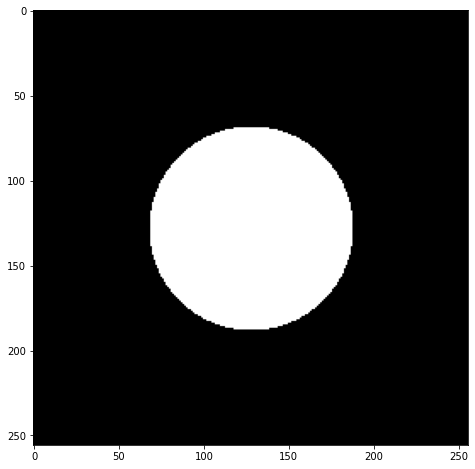

In [ ]:
plt.figure(figsize=(12, 8))
my_circ = draw_circle(60)
plt.imshow(my_circ, cmap="gray")

## Optimised image rotate

In [ ]:
def get_rot_matrix(theta):
  cos , sin = np.cos(theta), np.sin(theta)
  return np.array(([cos, -sin], [sin, cos]), dtype='float')

In [ ]:
#Original image rotate that wrote on preperatory report.
def rotate_image(img: np.ndarray, angle: float) -> np.ndarray:
    #convert angle to radian
    angle =np.deg2rad(angle)
    #claculate sin(angle), cos(angle)
    cosine=np.cos(angle)
    sine=np.sin(angle)
    
    # height = rows, width = cols
    height,width = img.shape
    
    # define rotate image filled with zeros, shape as original
    rotated_img = np.zeros((height,width))
    
    # Find the centre of original image 
    center_height = height//2  
    center_width = width//2
        
    for i in range(height):
        for j in range(width):
            #co-ordinates of pixel with respect to the centre of original image
            new_y = ((i - center_height)*cosine + (j - center_width)*sine + center_height).astype(int)
            new_x = ((j - center_width)*cosine - (i - center_height)*sine + center_width).astype(int)

            # adding if check to prevent any errors in the processing
            if ((new_y > 0) and (new_y < height)) and ((new_x > 0) and (new_x < width)):
                rotated_img[i,j]=img[new_y,new_x]

  
    return rotated_img

def rotate_coords(x, y, theta, ox, oy):
    """Rotate arrays of coordinates x and y by theta radians about the
    point (ox, oy).

    """
    s, c = np.sin(theta), np.cos(theta)
    x, y = np.asarray(x) - ox, np.asarray(y) - oy
    return x * c - y * s + ox, x * s + y * c + oy
#Optimised image rotate!
def rotate_image2(src, theta,fill=255):
    """Rotate the image src by theta radians about (ox, oy).
    Pixels in the result that don't correspond to pixels in src are
    replaced by the value fill.

    """
    oy,ox = src.shape[0]//2,src.shape[1]//2
    # Images have origin at the top left, so negate the angle.
    theta =np.deg2rad(theta)
    theta = -theta

    # Dimensions of source image. Note that scipy.misc.imread loads
    # images in row-major order, so src.shape gives (height, width).
    src_height, src_width = src.shape

    # Rotated positions of the corners of the source image.
    cx, cy = rotate_coords([0, src_width, src_width, 0], [0, 0, src_height, src_height], theta, ox, oy)

    # Determine dimensions of destination image.
    dw, dh = (int(np.ceil(c.max() - c.min())) for c in (cx, cy))

    # Coordinates of pixels in destination image.
    dx, dy = np.meshgrid(np.arange(dw), np.arange(dh))

    # Corresponding coordinates in source image. Since we are
    # transforming dest-to-src here, the rotation is negated.
    sx, sy = rotate_coords(dx + cx.min(), dy + cy.min(), -theta, ox, oy)

    # Select nearest neighbour.
    sx, sy = sx.round().astype(int), sy.round().astype(int)

    # Mask for valid coordinates.
    mask = (0 <= sx) & (sx < src_width) & (0 <= sy) & (sy < src_height)

    # Create destination image.
    dest = np.empty(shape=(dh, dw), dtype=src.dtype)

    # Copy valid coordinates from source image.
    dest[dy[mask], dx[mask]] = src[sy[mask], sx[mask]]

    # Fill invalid coordinates.
    dest[dy[~mask], dx[~mask]] = fill
    return dest

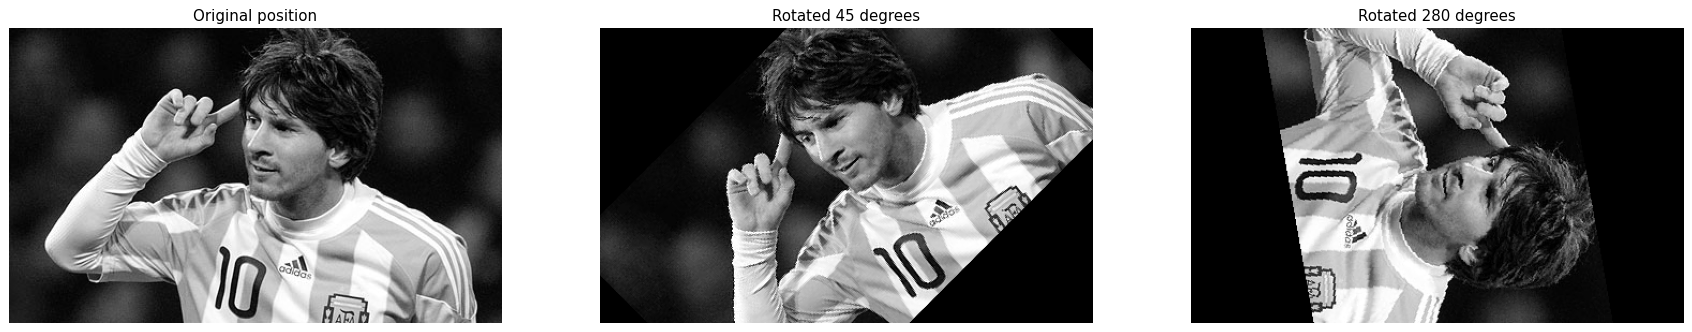

In [ ]:
fig = plt.figure(figsize=(24, 12),dpi= 90)
rows = 1
columns = 3
plt.subplot(rows,columns,1)
img_show(img,cmap='gray',title='Original position')
 
#rotated 45 degree
rotated45_img = rotate_image(img,45)
plt.subplot(rows,columns,2)
img_show(rotated45_img,cmap='gray',title='Rotated 45 degrees')
 
#rotated 280 degree
rotated280_img = rotate_image(img,280)
plt.subplot(rows,columns,3)
img_show(rotated280_img,cmap='gray',title='Rotated 280 degrees')

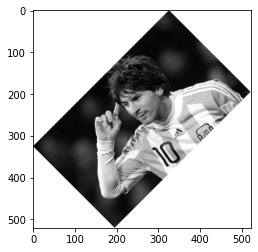

In [ ]:
# print(img[].shape)
rotate_img = rotate_image2(img, 45.0)
plt.imshow(rotate_img,cmap = 'gray')

In [ ]:
%timeit rotate_image2(img, 45.0)
%timeit rotate_image(img, 45.0)

10 loops, best of 5: 17.5 ms per loop
1 loop, best of 5: 500 ms per loop


I was able to reduce the runtime in the rotation function so the rotate_img2 function is the improvement of the rotate function I wrote in a preparatory report.

## Vertical and Horizonal Flip 



### Little demo horizontal and vertical flip

In [ ]:
A = np.array(((1,2),(3,4),(5,6)))
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
A[:,::-1]

array([[2, 1],
       [4, 3],
       [6, 5]])

In [ ]:
A[::-1,:]

array([[5, 6],
       [3, 4],
       [1, 2]])

In [ ]:
np.flip(A,axis=0)

array([[5, 6],
       [3, 4],
       [1, 2]])

In [ ]:
np.flip(A,axis=1)

array([[2, 1],
       [4, 3],
       [6, 5]])

## Vertical Flip 

In [ ]:
messi_color = cv2.imread('messi.jpg')
messi_color = cv2.cvtColor(messi_color, cv2.COLOR_BGR2RGB)

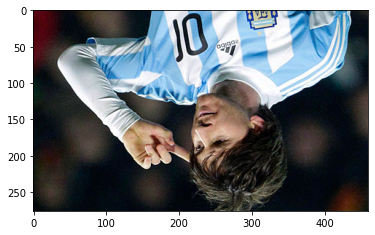

In [ ]:
vertical_flipped = messi_color[::-1,::,::]
plt.imshow (vertical_flipped) 
# TODO show flip by pi next to this image 

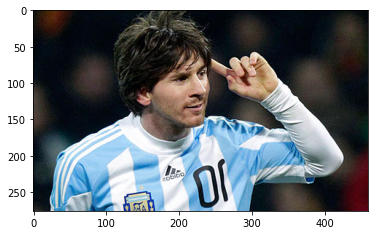

In [ ]:
horziontal_flipped = messi_color[::,::-1,::]
plt.imshow(horziontal_flipped)

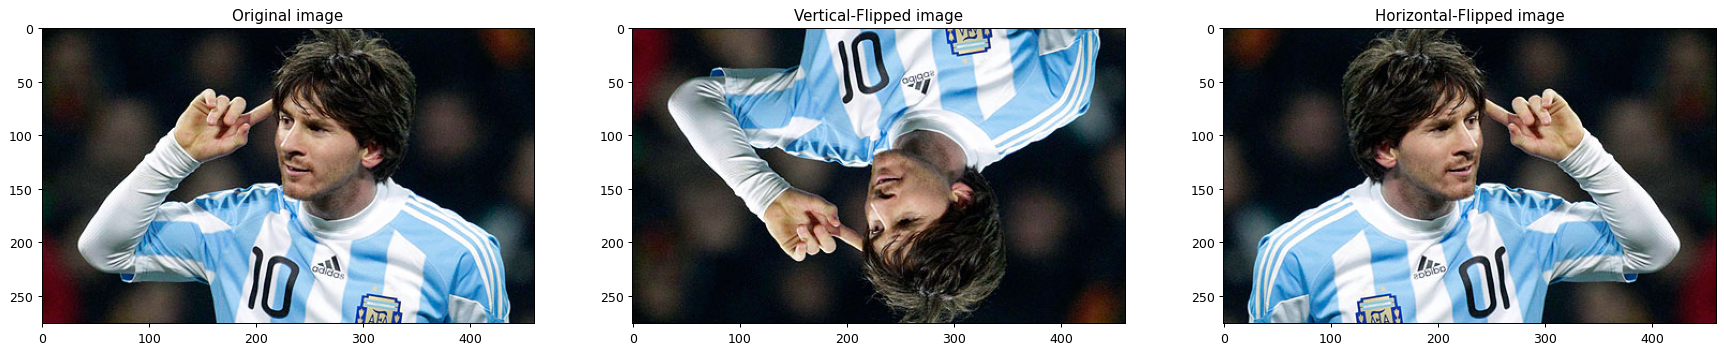

In [ ]:
#differces: source_img - blur_img
fig = plt.figure(figsize=(24, 12),dpi= 90)
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
plt.title("Original image")
plt.imshow(messi_color)
fig.add_subplot(rows, columns, 2)
plt.title("Vertical-Flipped image")
plt.imshow(vertical_flipped)
fig.add_subplot(rows, columns, 3)
plt.title("Horizontal-Flipped image")
plt.imshow(horziontal_flipped)

## Gaussian Blur 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6717136818f2166eba2db0cfc915d732add9c64f"></img>

np.linspace(): Create Evenly or Non-Evenly Spaced Arrays
[More about linspace](https://realpython.com/np-linspace-numpy/)

In [ ]:
def get_gaussian_filter(kernel_size, sigma, sig_range=1):
  space = np.linspace(-sig_range,sig_range,kernel_size)


  xx, yy = np.meshgrid(space,space)  

  gaussian = 1/(2*np.pi*sigma**2)*np.exp(-1*(xx**2+yy**2)/(2*sigma**2))
  return gaussian / gaussian.sum()

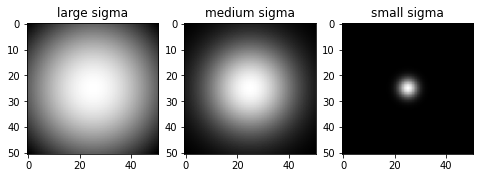

In [ ]:
gausssian_large_sigma = get_gaussian_filter(kernel_size=51, sigma=1)
gaussian_medium_sigma = get_gaussian_filter(kernel_size=51, sigma=0.5)
gaussian_small_sigma = get_gaussian_filter(kernel_size=51, sigma=0.1)


plt.figure(figsize=(8,24))

plt.subplot(131)
plt.imshow(gausssian_large_sigma, 'gray')
plt.title('large sigma')

plt.subplot(132)
plt.title('medium sigma')
plt.imshow(gaussian_medium_sigma, 'gray')

plt.subplot(133)
plt.title('small sigma')
plt.imshow(gaussian_small_sigma, 'gray')

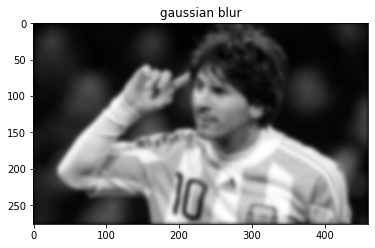

In [ ]:
gaussian_kernel = get_gaussian_filter(kernel_size=19, sigma=0.3 )
blurred_img_medium_sigma = convolve2d(img, gaussian_kernel, mode='same')
plt.imshow(blurred_img_medium_sigma, cmap='gray')
plt.title('gaussian blur')
plt.show()

## Median Filter
[Median of array](https://numpy.org/doc/stable/reference/generated/numpy.median.html)

In [ ]:
def median_single_channel(img, kernel_size):
    pad_h,pad_w = calc_padding(img.shape[0], img.shape[0], kernel_size),calc_padding(img.shape[1], img.shape[1], kernel_size)
    padded_img = np.pad(img,[pad_h,pad_w])
    #output like the image input
    res = np.zeros_like(img)
    for row in range(res.shape[0]):
      for col in range(res.shape[1]):
         res[row,col] = np.median(padded_img[row:row+kernel_size,col:col+kernel_size])


    return res

def calc_padding(dim_out, dim_in, kernel_size):
  return int(np.ceil((dim_out - dim_in + kernel_size) / 2) - 1)

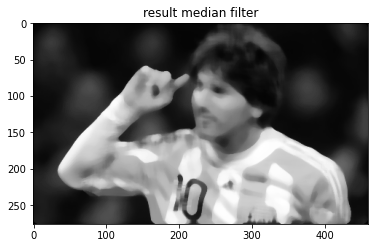

In [ ]:
medianed_img = median_single_channel(img, 11)
plt.imshow(medianed_img, 'gray')
plt.title('result median filter')
plt.show()

## ZOOM
if the zoom value is larger then 1 zoom out, 
if zoom value is smaller then 1 zoom in 

In [ ]:
def zoom_img(img,  zoom_x=1, zoom_y=1):

    """
    Center zoom in/out of the given image and returning an enlarged/shrinked view of 
    the image without changing dimensions
    ------        
    """
    if zoom_x == 0:
        return img

    height, width = img.shape # It's also the final desired shape
    new_height, new_width = int(height * zoom_y), int(width * zoom_x)
    
    # Centered bbox of the final desired size in resized (larger/smaller) image coordinates
    #start point (x1,y1)
    y1, x1 = max(0, new_height - height) // 2, max(0, new_width - width) // 2
    #end point (x2,y2)
    y2, x2 = y1 + height, x1 + width
    bbox = np.array([y1,x1,y2,x2])
    # Map back to original image coordinates
    bbox = (bbox / zoom_x).astype(int)
    y1, x1, y2, x2 = bbox
    cropped_img = img[y1:y2, x1:x2]
    
    # Handle padding when downscaling
    resize_height, resize_width = min(new_height, height), min(new_width, width)
    pad_height1, pad_width1 = (height - resize_height) // 2, (width - resize_width) //2
    pad_height2, pad_width2 = (height - resize_height) - pad_height1, (width - resize_width) - pad_width1
    pad_spec = [(pad_height1, pad_height2), (pad_width1, pad_width2)] + [(0,0)] * (img.ndim - 2)
    #output xoom-in or out image
    output = cv2.resize(cropped_img, (resize_width, resize_height))
    output = np.pad(output, pad_spec, mode='constant')

    return output



Text(0.5, 1.0, 'zoomed image: (276, 460)')

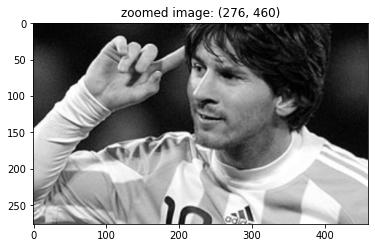

In [ ]:
zoomed_image = zoom_img(img, 1.5, 1.5)
plt.imshow(zoomed_image, cmap='gray')
plt.title('zoomed image: '+str(zoomed_image.shape))

## Crop 

In [ ]:
#       x1, y1, x2, y2 
bbox = [50, 50, 250,270] 
#imag[1st row:last row, 1st col: last col]
cropped_img = img[50:250,50:270]

Text(0.5, 1.0, 'cropped image: [50, 50, 250, 270]')

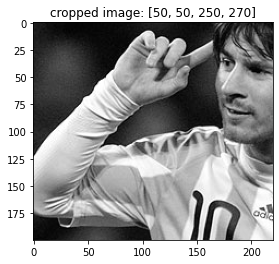

In [ ]:
plt.imshow(cropped_img,'gray')
plt.title('cropped image: '+str(bbox))

## sharpening
* Blurring vs. Sharpening:
  * Blurring/smooth is done in spatial domain by pixel averaging in a neighbors
  * Sharpening is an inverse process, to find the difference by the neighborhood, done by spatial differentiation.
![picture](https://drive.google.com//uc?export=view&id=1ZlPdVnf5OFfkNAVdMYc-RLHpiwPJMYGg)  
 

In [ ]:
def sharp_Image(img, kernel_size,alpha = 1):
  #Create a matrix from which we can obtain the original image by convolving it with the matrix
  original = np.zeros((kernel_size,kernel_size))
  original[kernel_size//2,kernel_size//2] = 1
  # Create a matrix that represents the low pass filter
  lp_filter = np.ones((kernel_size,kernel_size),dtype = 'float')/(float(kernel_size**2))
  # Create high pass filter by subtracting low pass filter from original matrix (delta)
  hp_filter = (original-lp_filter)
  hp_filter = hp_filter*alpha
  # The sharpen image will be created by adding the original image to the result and convolving it with a high pass filter
  sharp_img = img + np.abs(convolve2d(img,hp_filter,mode = 'same'))
  return sharp_img



Text(0.5, 1.0, ' normalized sharpened_img max value:1.0')

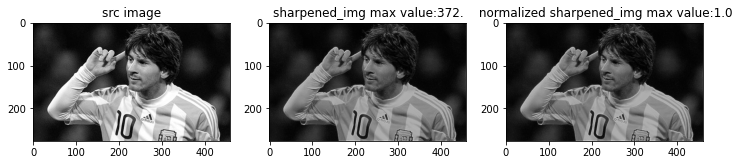

In [ ]:
alpha = 0.95
sharpened_img = sharp_Image(img,3,alpha)
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('src image')
plt.subplot(1, 3, 2)
plt.imshow(sharpened_img, cmap="gray")
plt.title("sharpened_img max value:"+str(sharpened_img.max())[:4])
plt.subplot(1, 3, 3)
normalized_sharpened_img = sharpened_img / sharpened_img.max()
plt.imshow(normalized_sharpened_img, cmap="gray")
plt.title(" normalized sharpened_img max value:" +
          str(normalized_sharpened_img.max()))


# Conclusions:
In this lab, I practiced different filters.
* Gaussian filter-   
The gaussian filter is demonstrated by constructing a circle using meshgrid and sig_range (demonstrate the gaussian filter), then using the gaussian formula I blurred that circle so that the result was the gaussian filter.  
* Median filter-   
Please note that the filter does not require new values as an input, the filter works with the current pixels values in the image, so that the current value is the median value that exists between the current pixels.  
![picture](https://drive.google.com//uc?export=view&id=14WzbWVKaq1RTGQodMxEbbs21zRwih_W8)  
  
* HPF -   
By subtracting LPF from the original image, I created HPF, then I activated convolution and added this result to the original image to get the sharpened image.  
* Rotate-  
This approach was described in a preliminary report for this lab. I optimized it so that the rotate image is smoother without affecting the pixels.
* Zoom-   
This method interpolates pixels.